In [384]:
import numpy as np
import rebound as rb
import reboundx as rx
import matplotlib.pyplot as plt

In [4]:
def system_evolution(archive, extras):
    """ 
    Pulling data from the called upon simulation archive using REBOUND and REBOUNDx to collect evolution of
    the secondary binary in the simulation. 
    """ # UPDATE THIS DESCRIPTION
    sim = None
    sim = rx.SimulationArchive(archive, rebxfilename=extras)
    sim_time = []
    
    # SECONDARY BINARY
    b2_ecc = []
    b2_semi = []
    b2_period = []
    
    for snap in range(len(sim)):
        base = sim[snap][0]
        time = base.t
        
        # SECONDARY BINARY        
        b2_a = base.particles["Binary 2"].a
        b2_e = base.particles["Binary 2"].e
        b2_P = base.particles["Binary 2"].P
        
        b2_ecc.append(b2_e)
        b2_semi.append(b2_a)
        b2_period.append(b2_P)
        sim_time.append(time)
        
        for key in base.particles.keys():
            print(key)

    return sim_time, b2_ecc, b2_semi, b2_period

In [5]:
planet_hash = []

for num in range(1,16):
    planet = f"Planet {num}"
    planet_hash.append(planet)
    
#planet_hash

In [68]:
def planet_evolution(archive, extras):
    """
    This one includes the planet hashes
    USE TRY, EXCEPT STATEMENT
    """
    
    sim = None
    sim = rx.SimulationArchive(archive, rebxfilename=extras) #rb.SimulationArchive(archive)
    
    planet_semi = []
    planet_ecc = []
    sim_time = []
    
    for planet in range(2,17):
        a = []
        e = []
        t = []
        for snap in range(len(sim)):            
            try:
                base = sim[snap][0]
                time = base.t 
                
                plan_a = base.particles[planet].a
                plan_e = base.particles[planet].e
            
                a.append(plan_a)
                e.append(plan_e)
                t.append(time)
                #print("Particle Found")
                
            except: #ParticleNotFound: # move onto the next iteration/planet
                #continue  # DO THE LIST INDEX ERROR
                print(f"In snap {snap+1} Planet {planet-2} Not Found")

        planet_semi.append(a)
        planet_ecc.append(e)
        sim_time.append(t)
        
    return sim_time, planet_semi, planet_ecc            

In [8]:
tup_num = 50
e_b = np.linspace(0, 0.8, tup_num)
a_p = np.linspace(1, 5, tup_num)

In [ ]:
# DO A TEST FOR A SIMULATION WHERE ALL PLANETS SURVIVE TO SEE IF THE PLANETS SHOW UP

In [51]:
a_val = np.round(a_p[28], 3) # INITIAL PLANETARY SEMI-MAJOR AXIS UNDER EVALUATION
e_val = np.round(e_b[-8], 3) # INITIAL BINARY ECCENTRICITY UNDER EVALUATION

print("e = ", e_val," a = ", a_val)

e =  0.686  a =  3.286


In [154]:
###### TURN THIS INTO A FUNCTION THAT DOES EITHER BINARY OR PLANETS
sim_arch_directory = "/mnt/raid-cita/ksmith/cope/"
xarch = "/mnt/raid-cita/ksmith/cope/xarchive_single_Qs10.npy"

In [66]:
#tests[1][0].particles[2].hash

In [16]:
# PLANET COLOURS

planet_colours = ["olive", "red", "orange", "greenyellow", "seagreen", "dodgerblue", "cyan", "blue", "magenta",
                 "pink", "peru", "grey", "teal", "darkviolet", "lime"]

In [63]:
def planet_ev(suite, Q):
    
    fig, axs = plt.subplots(2, 1, figsize=(15,15))
    
    for i in range(len(suite[0])): # len(suite[0]) is 15
        # sim_time, planet_semi, planet_ecc
        time = suite[0][i]
        semi_major = suite[1][i]
        planet_ecc = suite[2][i]
        
        axs[0].scatter(time, semi_major, color= planet_colours[i])
        axs[0].plot(time, semi_major, color= planet_colours[i], label = f"Planet {i+1}")
        
        axs[1].scatter(time, planet_ecc, color= planet_colours[i])
        axs[1].plot(time, planet_ecc,color= planet_colours[i], label = f"Planet {i+1}")

        
    axs[0].set_title("Planet Semi-Major Axis Evolution where $a_{p, initial}$ = " + f"{np.round(suite[1][0][0], 3)}, Q = {Q}")
    axs[0].set_ylabel("Semi-Major Axis")
    axs[0].set_xlabel("Simulation Time")
    axs[0].set_yscale("log")
    axs[0].legend(loc="center right")
    axs[0].grid()
    
    axs[1].set_title("Planet Eccentricity Evolution where $e_{p, initial}$ = " + f"{np.round(suite[2][0][0], 3)}, Q = {Q}")
    axs[1].set_ylabel("Eccentricity")
    axs[1].set_xlabel("Simulation Time")
    axs[1].set_yscale("log")
    axs[1].set_ylim([10e-3,1])
    axs[1].legend(loc="center right")
    axs[1].grid()

In [59]:
plan = planet_evolution(sim_arch_directory+f"sim_archive_Q100.0_eb{e_val}_ap{a_val}.npy", xarch)

In snap 4 Planet 11 Not Found
In snap 5 Planet 11 Not Found
In snap 6 Planet 11 Not Found
In snap 7 Planet 11 Not Found
In snap 8 Planet 11 Not Found
In snap 9 Planet 11 Not Found
In snap 10 Planet 11 Not Found
In snap 11 Planet 11 Not Found
In snap 12 Planet 11 Not Found
In snap 13 Planet 11 Not Found
In snap 14 Planet 11 Not Found
In snap 15 Planet 11 Not Found
In snap 16 Planet 11 Not Found
In snap 17 Planet 11 Not Found
In snap 18 Planet 11 Not Found
In snap 19 Planet 11 Not Found
In snap 20 Planet 11 Not Found
In snap 21 Planet 11 Not Found
In snap 22 Planet 11 Not Found
In snap 23 Planet 11 Not Found
In snap 24 Planet 11 Not Found
In snap 25 Planet 11 Not Found
In snap 26 Planet 11 Not Found
In snap 27 Planet 11 Not Found
In snap 28 Planet 11 Not Found
In snap 29 Planet 11 Not Found
In snap 30 Planet 11 Not Found
In snap 31 Planet 11 Not Found
In snap 32 Planet 11 Not Found
In snap 33 Planet 11 Not Found
In snap 34 Planet 11 Not Found
In snap 35 Planet 11 Not Found
In snap 36 Pla

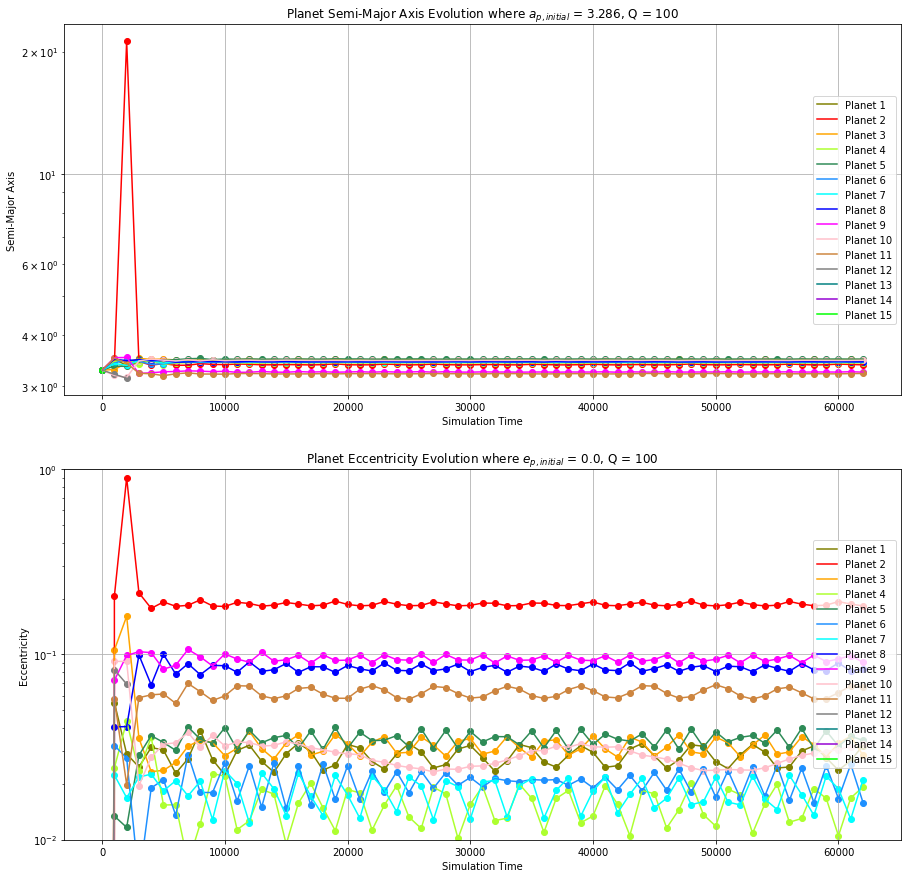

In [64]:
planet_ev(plan, 100)

In [74]:
sys_evolution = system_evolution(sim_arch_directory+f"sim_archive_Q100.0_eb{e_val}_ap{a_val}.npy", xarch)

<rebound.particle.Particle object at 0x7f21ba269840, m=1.0 x=-0.1571428571428571 y=0.0 z=0.0 vx=0.0 vy=-1.6376257758774384 vz=0.0>
<rebound.particle.Particle object at 0x7f21ba2698c0, m=1.0 x=0.1571428571428571 y=0.0 z=0.0 vx=0.0 vy=1.6376257758774384 vz=0.0>
<rebound.particle.Particle object at 0x7f21ba269840, m=0.0 x=0.90933583360921 y=-3.157376554841247 z=0.0 vx=0.7497158346309002 vy=0.21592086392381304 vz=0.0>
<rebound.particle.Particle object at 0x7f21ba2698c0, m=0.0 x=-2.8318154634765746 y=1.6663551686726001 z=0.0 vx=-0.39567433100665034 vy=-0.672411686362122 vz=0.0>
<rebound.particle.Particle object at 0x7f21ba269840, m=0.0 x=-2.855316051919792 y=-1.6257578574302227 z=0.0 vx=0.3860345409615952 vy=-0.6779918770593668 vz=0.0>
<rebound.particle.Particle object at 0x7f21ba2698c0, m=0.0 x=3.273401182946848 y=-0.28418842838707453 z=0.0 vx=0.06748025174696722 vy=0.7772657639431182 vz=0.0>
<rebound.particle.Particle object at 0x7f21ba269840, m=0.0 x=-0.47298830645055523 y=-3.25149203125

In [75]:
sys_evolution

([0.0,
  1000.0009999798091,
  2000.0000001780788,
  3000.0000003818054,
  4000.0000005855322,
  5000.000000789259,
  6000.000000992985,
  7000.000001196712,
  8000.000001400439,
  9000.000001604165,
  10000.000001807892,
  11000.000002011619,
  12000.000002215345,
  13000.000002419072,
  14000.000002622799,
  15000.000002826526,
  16000.000003030253,
  17000.000000992983,
  18000.000997558727,
  19000.000994124475,
  20000.000990690223,
  21000.00098725597,
  22000.00098382172,
  23000.000980387467,
  24000.000976953215,
  25000.000973518963,
  26000.00097008471,
  27000.00096665046,
  28000.000963216207,
  29000.000959781955,
  30000.000956347703,
  31000.00095291345,
  32000.0009494792,
  33000.00094773297,
  34000.00095157468,
  35000.000955416384,
  36000.00095925809,
  37000.000963099796,
  38000.0009669415,
  39000.00097078321,
  40000.00097462491,
  41000.00097846662,
  42000.000982308324,
  43000.00098615003,
  44000.000989991735,
  45000.00099383344,
  46000.000997675146,
  4

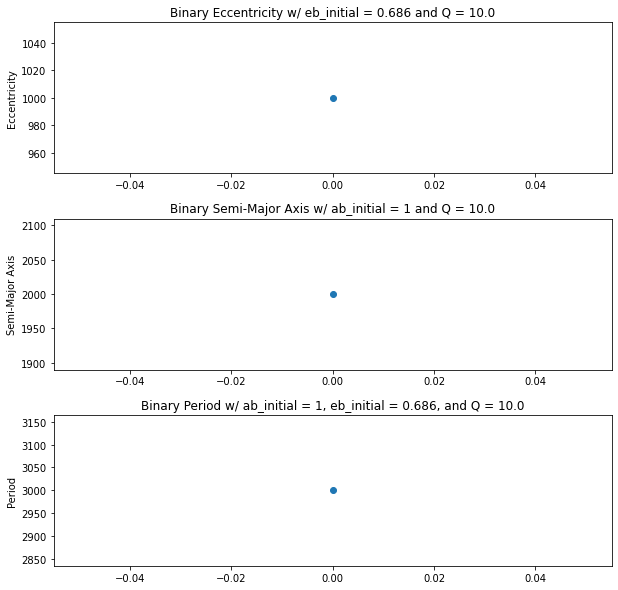

In [77]:
fig, axs = plt.subplots(3, figsize=(10,10))

axs[0].plot(sys_evolution[0][0], sys_evolution[0][1])
axs[0].scatter(sys_evolution[0][0], sys_evolution[0][1])
axs[0].set_title(f"Binary Eccentricity w/ eb_initial = {e_val} and Q = {1e1}")
axs[0].set_ylabel("Eccentricity")

axs[1].plot(sys_evolution[0][0], sys_evolution[0][2])
axs[1].scatter(sys_evolution[0][0], sys_evolution[0][2])
axs[1].set_title(f"Binary Semi-Major Axis w/ ab_initial = 1 and Q = {1e1}")
axs[1].set_ylabel("Semi-Major Axis")

axs[2].plot(sys_evolution[0][0], sys_evolution[0][3])
axs[2].scatter(sys_evolution[0][0], sys_evolution[0][3])
axs[2].set_title(f"Binary Period w/ ab_initial = 1, eb_initial = {e_val}, and Q = {1e1}")
axs[2].set_ylabel("Period")

# SHARE X AXIS
# LABEL X AND Y AXES
plt.subplots_adjust(hspace=0.3)

## EVOLUTION TIME

In [84]:
MU = 0.5
M1 = M2 = 1
G = 1 # gravitational constant is now 1 to reflect REBOUND units for the odeint (#G = 6.67E-11)
R_star = 0.1*(1-0.5)**(1/3)
ab = 1

In [83]:
NB = sim [0][0].particles[1].n
K0 = ((3/2)*(NB**2)*k_2*tau)*((G*(M1**2))/R_star)*((M1/M2)**2)*(R_star/a)**6
#tau must be manually input

In [167]:
def sim_params(archive, extras):
    
    """ Grabbing the simulation parameters from the simulation archive"""
    sim = None
    sim = rx.SimulationArchive(archive, rebxfilename=extras)    
    
    tau = sim[0][0].particles[0].params["tctl_tau"]
    k_2 = sim[0][0].particles[0].params["tctl_k2"]
    nb = sim[0][0].particles[1].n
    e = np.round(sim[0][0].particles[1].e, 1)
    
    if tau == 0:
        Q = np.inf
    else:
        Q = 3/(2*tau*k_2*nb)
    
    return nb, k_2, tau, Q

In [437]:
def ecc_dampening_time(e, NB, tau, k_2):

    num1 = 1. + 15./2.*e**2. + 45./8.*e**4. + 5./16.*e**6.
    den1 = (1.-e**2.)**6.
    N = num1/den1

    num2 = 1. + 31./2.*e**2. + 255./8.*e**4. + 185./16.*e**6. + 25./64.*e**8.
    den2 = (1.-e**2.)**(15./2.)
    Na = num2/den2

    num3 = 1. + 3./2.*e**2. + 1./8.*e**4.
    den3 = (1.-e**2.)**5.
    Omegae = num3/den3

    num4 = 1. + 15./4.*e**2. + 15./8.*e**4. + 5./64.*e**6.
    den4 = (1.-e**2.)**(13./2.)
    Ne = num4/den4

    num5 = 1. + 3.*e**2. + 3./8.*e**4.
    den5 = (1.-e**2.)**(9./2.)
    Omega = num5/den5

    om_eq = N/Omega  # This is the "pseudo-synchronous" rotation
    Fe = Omegae*om_eq - 18./11.*Ne
 
    Fa = 4./11.*(N*om_eq - Na)

    ab0 = ab = 1 ##
    K0 = ((3/2)*(NB**2)*k_2*tau)*((G*(M1**2))/R_star)*((M1/M2)**2)*(R_star/ab)**6
    k = K0*(ab0/ab)**9
    
    try:
        dedt = ((11*e*ab*k)/(G*M1*M2))*Fe       
        damp = abs(e/dedt)
    except ZeroDivisionError:
        damp = 0.0
    
    return damp

In [443]:
def ab_dampening_time(e, NB, tau, k_2):

    num1 = 1. + 15./2.*e**2. + 45./8.*e**4. + 5./16.*e**6.
    den1 = (1.-e**2.)**6.
    N = num1/den1

    num2 = 1. + 31./2.*e**2. + 255./8.*e**4. + 185./16.*e**6. + 25./64.*e**8.
    den2 = (1.-e**2.)**(15./2.)
    Na = num2/den2

    num3 = 1. + 3./2.*e**2. + 1./8.*e**4.
    den3 = (1.-e**2.)**5.
    Omegae = num3/den3

    num4 = 1. + 15./4.*e**2. + 15./8.*e**4. + 5./64.*e**6.
    den4 = (1.-e**2.)**(13./2.)
    Ne = num4/den4

    num5 = 1. + 3.*e**2. + 3./8.*e**4.
    den5 = (1.-e**2.)**(9./2.)
    Omega = num5/den5

    om_eq = N/Omega  # This is the "pseudo-synchronous" rotation
    Fe = Omegae*om_eq - 18./11.*Ne
 
    Fa = 4./11.*(N*om_eq - Na)

    ab0 = ab = 1 ##
    K0 = ((3/2)*(NB**2)*k_2*tau)*((G*(M1**2))/R_star)*((M1/M2)**2)*(R_star/ab)**6
    k = K0*(ab0/ab)**9
    
    try:
        dadt = ((11*k*ab**2)/(G*M1*M2))*(Fa)       
        damp = abs(ab0/dadt)
    except ZeroDivisionError:
        damp = 0.0 
    
    return damp

In [ ]:
# e, NB, tau, k_2

In [185]:
np.round(a_p[13], 3)

2.061

In [345]:
# EXTREME TIDES W/ Q=10**1
xtr_tides = sim_params(sim_arch_directory+f"sim_archive_Q10.0_eb0.800_ap{np.round(a_p[13], 3)}.npy", xarch)
xtr_tides

(1.4142135623730914, 0.035, 3.03045763365664, 10.0)

In [439]:
ecc_dampening_time(0.800, xtr_tides[0], xtr_tides[2], xtr_tides[1])

79.11181507424307

In [444]:
ab_dampening_time(0.800, xtr_tides[0], xtr_tides[2], xtr_tides[1])

22.25019798963082

In [347]:
# NO TIDES W/ Q -> inf
no_tides = sim_params(sim_arch_directory+f"sim_archive_Qinf_eb0.800_ap{np.round(a_p[13], 3)}.npy", "/mnt/raid-cita/ksmith/cope/xarchive_single_Qsinf.npy")
no_tides

(1.4142135623730914, 0.035, 0.0, inf)

In [445]:
ecc_dampening_time(0.800, no_tides[0], no_tides[2], no_tides[1])

0.0

In [446]:
ab_dampening_time(0.800, no_tides[0], no_tides[2], no_tides[1])

0.0

## Absolute Value of Cirularization Times as a Function of Binary Eccentricity

In [189]:
sim_arch_directory

'/mnt/raid-cita/ksmith/cope/'

In [190]:
xarch

'/mnt/raid-cita/ksmith/cope/xarchive_single_Qs10.npy'

In [451]:
def circ_time(eccentricities, Q):
    """
    """
    e = [] # REDUNDANT, REMOVE AND JUST PLOT e_b
    a = np.ones(50)
    
    ecc_circ = []
    ab_circ = []

    if Q != np.inf:
        Q1 = float(Q)
        Q2 = int(Q)
    else:
        Q1 = Q2 = Q
    
    for num in range(len(eccentricities)):
        E = format(eccentricities[num], ".3f")

        ARCHIVE = sim_arch_directory+f"sim_archive_Q{Q1}_eb{E}_ap5.000.npy" # ap will remain constant
        EXTRAS = f"/mnt/raid-cita/ksmith/cope/xarchive_single_Qs{Q2}.npy" # xtras will remain constant

        PARAMS = sim_params(ARCHIVE, EXTRAS) # output = nb, k_2, tau, Q

        NB = PARAMS[0]
        K2 = PARAMS[1]
        TAU = PARAMS[2]
        
        ecc = float(E)
        ecc_circularization_time = ecc_dampening_time(ecc, NB, TAU, K2)
        ab_circularization_time = ab_dampening_time(ecc, NB, TAU, K2)
        
        e.append(ecc)
        ecc_circ.append(abs(ecc_circularization_time))
        ab_circ.append(abs(ab_circularization_time))
    
    return e, ecc_circ, a, ab_circ

## TURN EVERYTHING BELOW INTO ONE FUNCTION TO ULTIMATELY PLOT THE BINARY ECCENTRICITY DAMPENING TIME

## OVERPLOT FOR ALL Q?

In [491]:
def ecc_damp_plot_all(eccentricity_list, Q_list):
    """
    Plots the binary eccentricity dampening time for a given set of initial binary 
    eccentricity values and a tidal Q
    """
    fig, axs = plt.subplots(figsize=(15,8))
    axs.set_title("Binary Eccentricity Dampening Time", size=15)
    axs.set_xlabel(r"Initial Binary Eccentricity, $e_{b}$", size=15)
    axs.set_ylabel(r"Binary Eccentricity ($e_{b}$) Circularization Time, [Simulation Time Units]", size=15)
    axs.set_yscale('symlog')
    axs.grid()
    
    colours = ["red", "black", "darkorange", "blue", "cyan"]
    
    for num in range(len(Q_list)):
        Q = Q_list[num]
        dampening = circ_time(eccentricity_list, Q)

        axs.scatter(dampening[0], dampening[1], color= colours[num], label=f"Q = {Q}")
        axs.plot(dampening[0], dampening[1], color= colours[num])

    axs.legend()

In [452]:
Qs = [1e1, 1e2, 1e3, 1e4, np.inf]

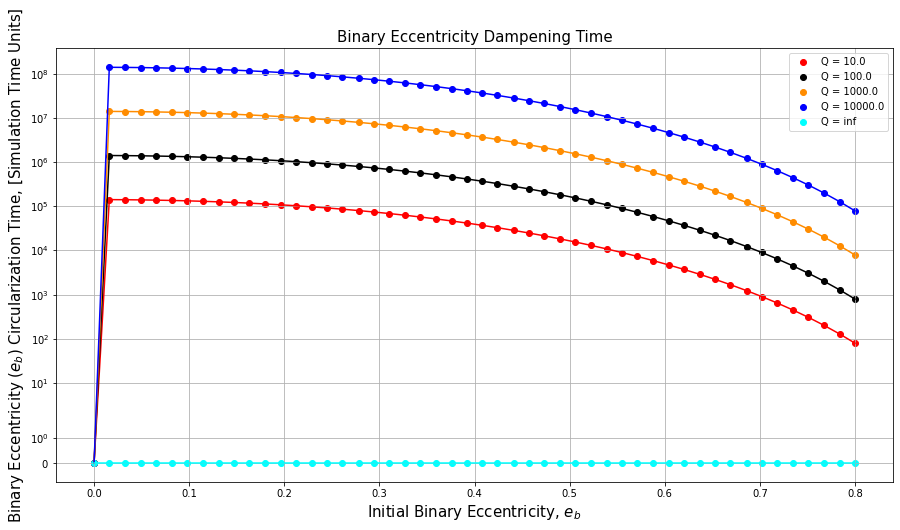

In [492]:
ecc_damp_plot_all(e_b, Qs)

In [421]:
def damp_plot(eccentricity_list, Q):
    """
    Plots the binary eccentricity dampening time for a given set of initial binary 
    eccentricity values and a tidal Q
    """
    
    dampening = circ_time(eccentricity_list, Q)

    fig, axs = plt.subplots(figsize=(15,8))
    axs.scatter(dampening[0], dampening[1], color = "olive")
    axs.plot(dampening[0], dampening[1], color = "olive")
    
    axs.set_title(f"Binary Eccentricity Dampening Time, w. Q = {Q}", size=15)
    axs.set_xlabel(r"Initial Binary Eccentricity, $e_{b}$", size=15)
    axs.set_ylabel("Circularization Time, [Simulation Time Units]", size=15)
    axs.grid()

    if Q != np.inf: 
        axs.set_yscale('log')

In [432]:
#damp_plot(e_b, 1e1)

In [431]:
#damp_plot(e_b, 1e2)

In [430]:
#damp_plot(e_b, 1e3)

In [428]:
#damp_plot(e_b, 1e4)

In [427]:
#damp_plot(e_b, np.inf)

In [489]:
def ab_damp_plot_all(eccentricity_list, Q_list):
    """
    Plots the binary semi-major axis dampening time for a given initial binary 
    semi-major axis (a_b = 1) and a tidal Q
    """
    fig, axs = plt.subplots(figsize=(15,8))
    axs.set_title("Binary Semi-Major Axis Dampening Time", size=15) # WRITE EQUATION HERE
    axs.set_xlabel(r"Initial Binary Eccentricity, $e_{b}$", size=15)
    # WILL MEED TO SET X AXIS TO SOMETHING ELSE B/C a_b = 1 ALL THE TIME
    axs.set_ylabel(r"Binary Semi-Major Axis ($a_{b}$) Circularization Time, [Simulation Time Units]", size=15)
    axs.grid()
    axs.set_yscale('symlog')
    colours = ["red", "black", "darkorange", "blue", "cyan"]
    
    for num in range(len(Q_list)):
        Q = Q_list[num]
        dampening = circ_time(eccentricity_list, Q)

        axs.scatter(dampening[0], dampening[3], color= colours[num], label=f"Q = {Q}")
        axs.plot(dampening[0], dampening[3], color= colours[num])

    axs.legend()

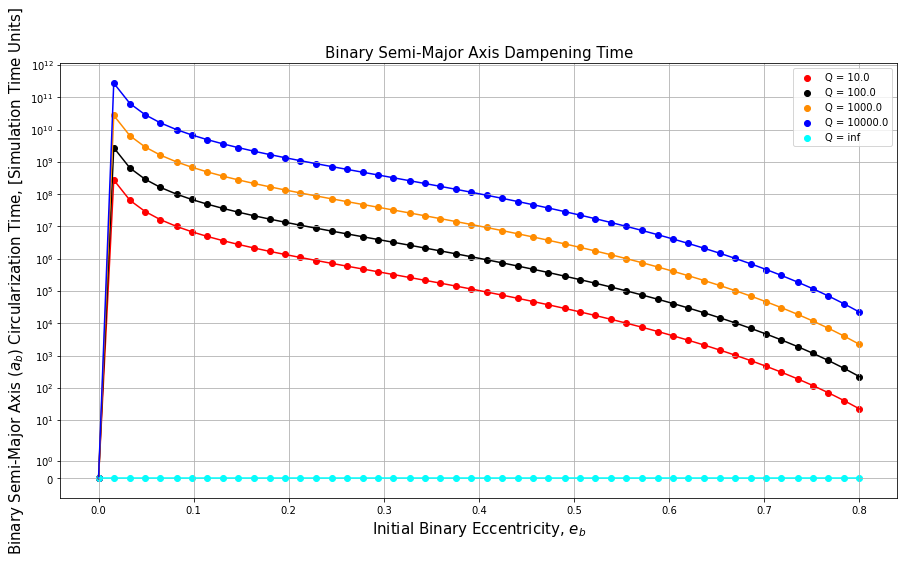

In [490]:
ab_damp_plot_all(e_b, Qs)